## Introdução sobre o Projeto

### Etapa 1. Pré-Processamento dos Dados

In [1]:
#importando bibliotecas

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [25]:
#evitar avisos ao plotar gráficos no seaborn
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [26]:
#lendo o arquivo excel
df_1 = pd.read_excel(r'Clean_Ads_Data.xlsx')

In [28]:
#visualizando as três primeiras linhas
df_1.tail()

,Timestamp,Date,Hour of Day,Date.1,InventoryType,AD Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
25853,2014-11-24-02,2014-11-24,2,Monday,Format2,728x90,Inter221,App,Mobile,Display,3765357,2197060,2073627,2501,3822.17,0.33,2560.8539,0.001206,1.843229,1.528257
25854,2014-11-24-06,2014-11-24,6,Monday,Format2,728x90,Inter226,Web,Mobile,Display,4328962,2506395,2371296,3370,5150.49,0.30,3605.3430,0.001421,2.172015,1.528335
25855,2014-11-24-03,2014-11-24,3,Monday,Format2,728x90,Inter229,Video,Desktop,Display,2671605,1518045,1419950,1498,2452.10,0.35,1593.8650,0.001055,1.726892,1.636916
25856,2014-11-24-05,2014-11-24,5,Monday,Format2,728x90,Inter225,Video,Mobile,Display,2454545,1395398,1311065,1564,2582.23,0.35,1678.4495,0.001193,1.969567,1.651042
25857,2014-11-24-04,2014-11-24,4,Monday,Format2,728x90,Inter220,Web,Mobile,Video,2219556,1224363,1142647,1229,2036.80,0.35,1323.9200,0.001076,1.782528,1.657282


In [36]:
# Média de receita por gasto, agrupado por dispositivo e plataforma
df_intermediario = df_1
df_intermediario['nova coluna'] = df_1['Revenue'] / df_1['Spend']
df_intermediario[['Device Type', 'nova coluna','Platform']].groupby(['Device Type','Platform']).agg(['mean'])

nova coluna
                            mean
Device Type Platform            
Desktop     Video       0.664804
            Web         0.664989
Mobile      App         0.664838
            Video       0.664967
            Web         0.664522

<Axes: xlabel='Date.1', ylabel='Clicks'>

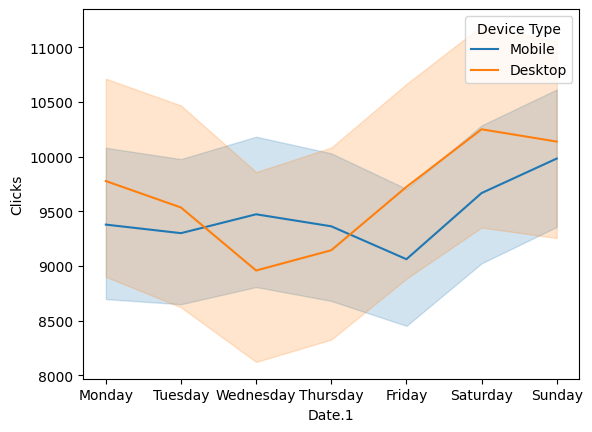

In [44]:
sns.lineplot(data=df_1,x = 'Date.1', y='Clicks', hue='Device Type' )

In [5]:
df_1.columns

Index(['Timestamp', 'Date', 'Hour of Day', 'Date.1', 'InventoryType',
       'AD Size', 'Ad Type', 'Platform', 'Device Type', 'Format',
       'Available_Impressions', 'Matched_Queries', 'Impressions', 'Clicks',
       'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC'],
      dtype='object')

In [14]:
df_1.corr(numeric_only=True)

,Hour of Day,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
Hour of Day,1.000000,0.200995,0.184373,0.183333,0.233153,0.171485,-0.167083,0.167154,0.015206,-0.113453,-0.172470
Available_Impressions,0.200995,1.000000,0.995055,0.994960,0.135481,0.894798,-0.819397,0.899322,-0.348244,-0.288243,0.579097
Matched_Queries,0.184373,0.995055,1.000000,0.999923,0.148232,0.907152,-0.836872,0.910845,-0.344413,-0.282856,0.594581
Impressions,0.183333,0.994960,0.999923,1.000000,0.140750,0.903872,-0.833097,0.907536,-0.346365,-0.284969,0.595932
Clicks,0.233153,0.135481,0.148232,0.140750,1.000000,0.503474,-0.548286,0.486217,0.152387,0.174018,-0.078755
Spend,0.171485,0.894798,0.907152,0.903872,0.503474,1.000000,-0.958340,0.998716,-0.232565,-0.154497,0.513793
Fee,-0.167083,-0.819397,-0.836872,-0.833097,-0.548286,-0.958340,1.000000,-0.960203,0.164956,0.098328,-0.425678
Revenue,0.167154,0.899322,0.910845,0.907536,0.486217,0.998716,-0.960203,1.000000,-0.223882,-0.149614,0.500487
CTR,0.015206,-0.348244,-0.344413,-0.346365,0.152387,-0.232565,0.164956,-0.223882,1.000000,0.773081,-0.486335
CPM,-0.113453,-0.288243,-0.282856,-0.284969,0.174018,-0.154497,0.098328,-0.149614,0.773081,1.000000,-0.351165


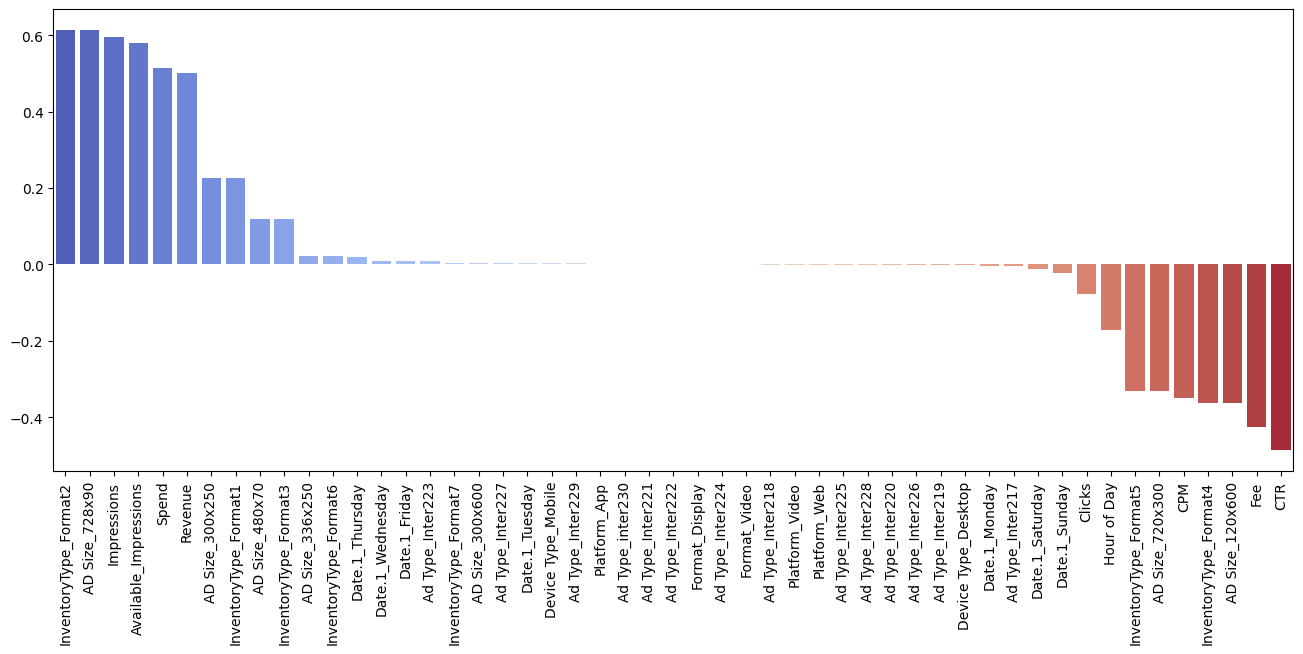

In [50]:
dummies = pd.get_dummies(df_1[[ 'Hour of Day', 'Date.1', 'InventoryType',
       'AD Size', 'Ad Type', 'Platform', 'Device Type', 'Format',
       'Available_Impressions', 'Impressions', 'Clicks',
       'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']])
teste = dummies.corr()['CPC'].sort_values(ascending=False)[1:]

fig, ax = plt.subplots(figsize= (16, 6))
sns.barplot(x=teste.index, y=teste.values, palette='coolwarm')
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('')

plt.show()

In [143]:
#visualizando as principais info do dataframe
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25858 entries, 0 to 25857
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              25858 non-null  object        
 1   Date                   25858 non-null  datetime64[ns]
 2   Hour of Day            25858 non-null  int64         
 3   Date.1                 25858 non-null  object        
 4   InventoryType          25858 non-null  object        
 5   AD Size                25857 non-null  object        
 6   Ad Type                25858 non-null  object        
 7   Platform               25858 non-null  object        
 8   Device Type            25858 non-null  object        
 9   Format                 25858 non-null  object        
 10  Available_Impressions  25858 non-null  int64         
 11  Matched_Queries        25858 non-null  int64         
 12  Impressions            25858 non-null  int64         
 13  C

In [ ]:
df_1.describe(exclude='number')

In [144]:
#principais estatísticas do dataframe

df_1.describe()

,Date,Hour of Day,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,25858,25858.000000,2.585800e+04,2.585800e+04,2.585800e+04,25858.000000,25858.000000,25858.000000,25858.000000,25858.000000,25858.000000,25858.000000
mean,2014-10-13 12:39:28.999922688,11.560407,2.170312e+06,1.155718e+06,1.107910e+06,9526.391252,2415.146152,0.336725,1717.072689,0.075019,7.524461,0.300359
min,2014-09-01 00:00:00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.210000,0.000000,0.000000,0.000000,0.000000
25%,2014-09-23 00:00:00,6.000000,9.133500e+03,5.451500e+03,2.559000e+03,305.000000,36.030000,0.350000,23.419500,0.002343,1.573372,0.078004
50%,2014-10-14 00:00:00,12.000000,3.310695e+05,1.895120e+05,1.621955e+05,3457.000000,1173.745000,0.350000,762.934250,0.007177,2.959644,0.118332
75%,2014-11-03 00:00:00,18.000000,2.208674e+06,1.008255e+06,9.499750e+05,10685.500000,2692.745000,0.350000,1750.284250,0.130617,12.448876,0.499956
max,2014-11-24 00:00:00,23.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.177300,2.000000,715.000000,7.264000
std,NaN,6.915733,4.543952e+06,2.408041e+06,2.327426e+06,16721.563722,3934.248083,0.030546,2994.152333,0.091288,8.928088,0.338831


In [145]:
#função para visualizar os valores únicos e nulos por colunas

def valores_unicos(df):
    for coluna in df.columns:
        print(f'Coluna {coluna}:')
        
        contar_valores = df[coluna].value_counts()
        porcentagem_valores = df[coluna].value_counts(normalize=True) * 100
        resultado_valores = pd.concat([contar_valores, porcentagem_valores], axis=1, 
                                     keys=['Qnt', 'Porcentagem']).round(2)
        print(resultado_valores)

        print(f'Valores nulos: {df[coluna].isnull().sum()}')
        print('\n')

#visualizando os valores 
valores_unicos(df_1)

Coluna Timestamp:
               Qnt  Porcentagem
Timestamp                      
2014-10-13-16   13         0.05
2014-10-28-23   13         0.05
2014-10-27-07   13         0.05
2014-10-27-01   13         0.05
2014-10-27-14   13         0.05
...            ...          ...
2014-09-04-01   11         0.04
2014-09-01-18   11         0.04
2014-09-04-22   11         0.04
2014-09-04-02   11         0.04
2014-09-01-16    9         0.03

[2018 rows x 2 columns]
Valores nulos: 0


Coluna Date:
            Qnt  Porcentagem
Date                        
2014-10-19  312         1.21
2014-11-20  312         1.21
2014-11-19  312         1.21
2014-11-18  312         1.21
2014-11-17  312         1.21
...         ...          ...
2014-09-04  278         1.08
2014-09-03  278         1.08
2014-09-02  274         1.06
2014-11-24  247         0.96
2014-09-01   90         0.35

[85 rows x 2 columns]
Valores nulos: 0


Coluna Hour of Day:
              Qnt  Porcentagem
Hour of Day                   
17      

            Qnt  Porcentagem
Revenue                     
0.0000     2683        10.38
0.0065      189         0.73
0.0260       60         0.23
0.0130       57         0.22
0.0195       56         0.22
...         ...          ...
232.1280      1         0.00
1364.7205     1         0.00
780.8320      1         0.00
361.1920      1         0.00
1323.9200     1         0.00

[20468 rows x 2 columns]
Valores nulos: 0


Coluna CTR:
           Qnt  Porcentagem
CTR                        
0.000000  2791        10.79
0.200000    74         0.29
0.500000    74         0.29
0.250000    69         0.27
0.333333    54         0.21
...        ...          ...
0.167331     1         0.00
0.085714     1         0.00
0.092276     1         0.00
0.120637     1         0.00
0.001076     1         0.00

[22064 rows x 2 columns]
Valores nulos: 0


Coluna CPM:
            Qnt  Porcentagem
CPM                         
0.000000   2683        10.38
10.000000    71         0.27
5.000000     43         0.17


In [146]:
#removendo a única linha que possui valor nulo no data set

df_1 = df_1.dropna(subset=['AD Size'])

In [147]:
#verificando se há linhas duplicadas 

df_1.duplicated().sum()

0

In [148]:
#visualizando as colunas Date e Timestamp

print(df_1['Timestamp'].head())
print(df_1['Date'].head())
print(df_1['Hour of Day'].head())


0    2014-09-01-23
1    2014-09-01-18
2    2014-09-01-17
3    2014-09-01-20
4    2014-09-01-22
Name: Timestamp, dtype: object
0   2014-09-01
1   2014-09-01
2   2014-09-01
3   2014-09-01
4   2014-09-01
Name: Date, dtype: datetime64[ns]
0    23
1    18
2    17
3    20
4    22
Name: Hour of Day, dtype: int64


In [149]:
#excluindo a coluna Timestamp

df_1 = df_1.drop(columns=['Timestamp'])

#criando uma coluna para mês

df_1['Month'] = df_1['Date'].dt.month


#visualizando as três primeiras linhas 

df_1.head(3)

,Date,Hour of Day,Date.1,InventoryType,AD Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Month
0,2014-09-01,23,Monday,Format1,300x250,Inter228,Video,Mobile,Video,1911,336,334,0,0.0,0.35,0.0,0.0,0.0,0.0,9
1,2014-09-01,18,Monday,Format7,300x600,Inter218,App,Mobile,Display,1987,325,324,0,0.0,0.35,0.0,0.0,0.0,0.0,9
2,2014-09-01,17,Monday,Format7,300x600,Inter222,Video,Desktop,Display,2375,434,428,0,0.0,0.35,0.0,0.0,0.0,0.0,9


In [150]:
#substituir espaços e pontos por _ nos nomes das colunas

df_1.columns = df_1.columns.str.replace(' ', '_').str.replace('.', '_' )

#renomeando a coluna InventoryType

df_1.rename(columns={'InventoryType': 'Inventory_Type'}, inplace=True)

#visualizando as três primeiras linhas 

df_1.head(3)

,Date,Hour_of_Day,Date_1,Inventory_Type,AD_Size,Ad_Type,Platform,Device_Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Month
0,2014-09-01,23,Monday,Format1,300x250,Inter228,Video,Mobile,Video,1911,336,334,0,0.0,0.35,0.0,0.0,0.0,0.0,9
1,2014-09-01,18,Monday,Format7,300x600,Inter218,App,Mobile,Display,1987,325,324,0,0.0,0.35,0.0,0.0,0.0,0.0,9
2,2014-09-01,17,Monday,Format7,300x600,Inter222,Video,Desktop,Display,2375,434,428,0,0.0,0.35,0.0,0.0,0.0,0.0,9


##### 2. Identificação e Tratamento de Outliers

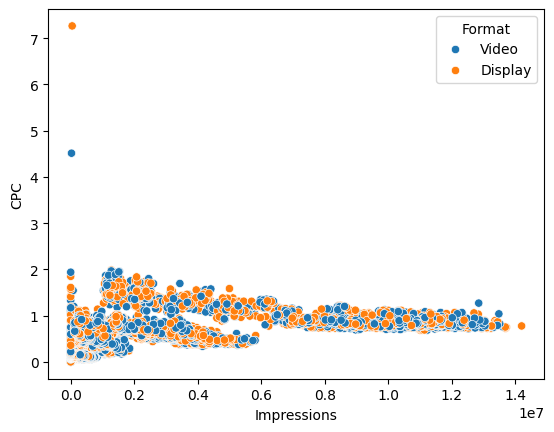

In [24]:
sns.lineplot(data=df_1, x='')

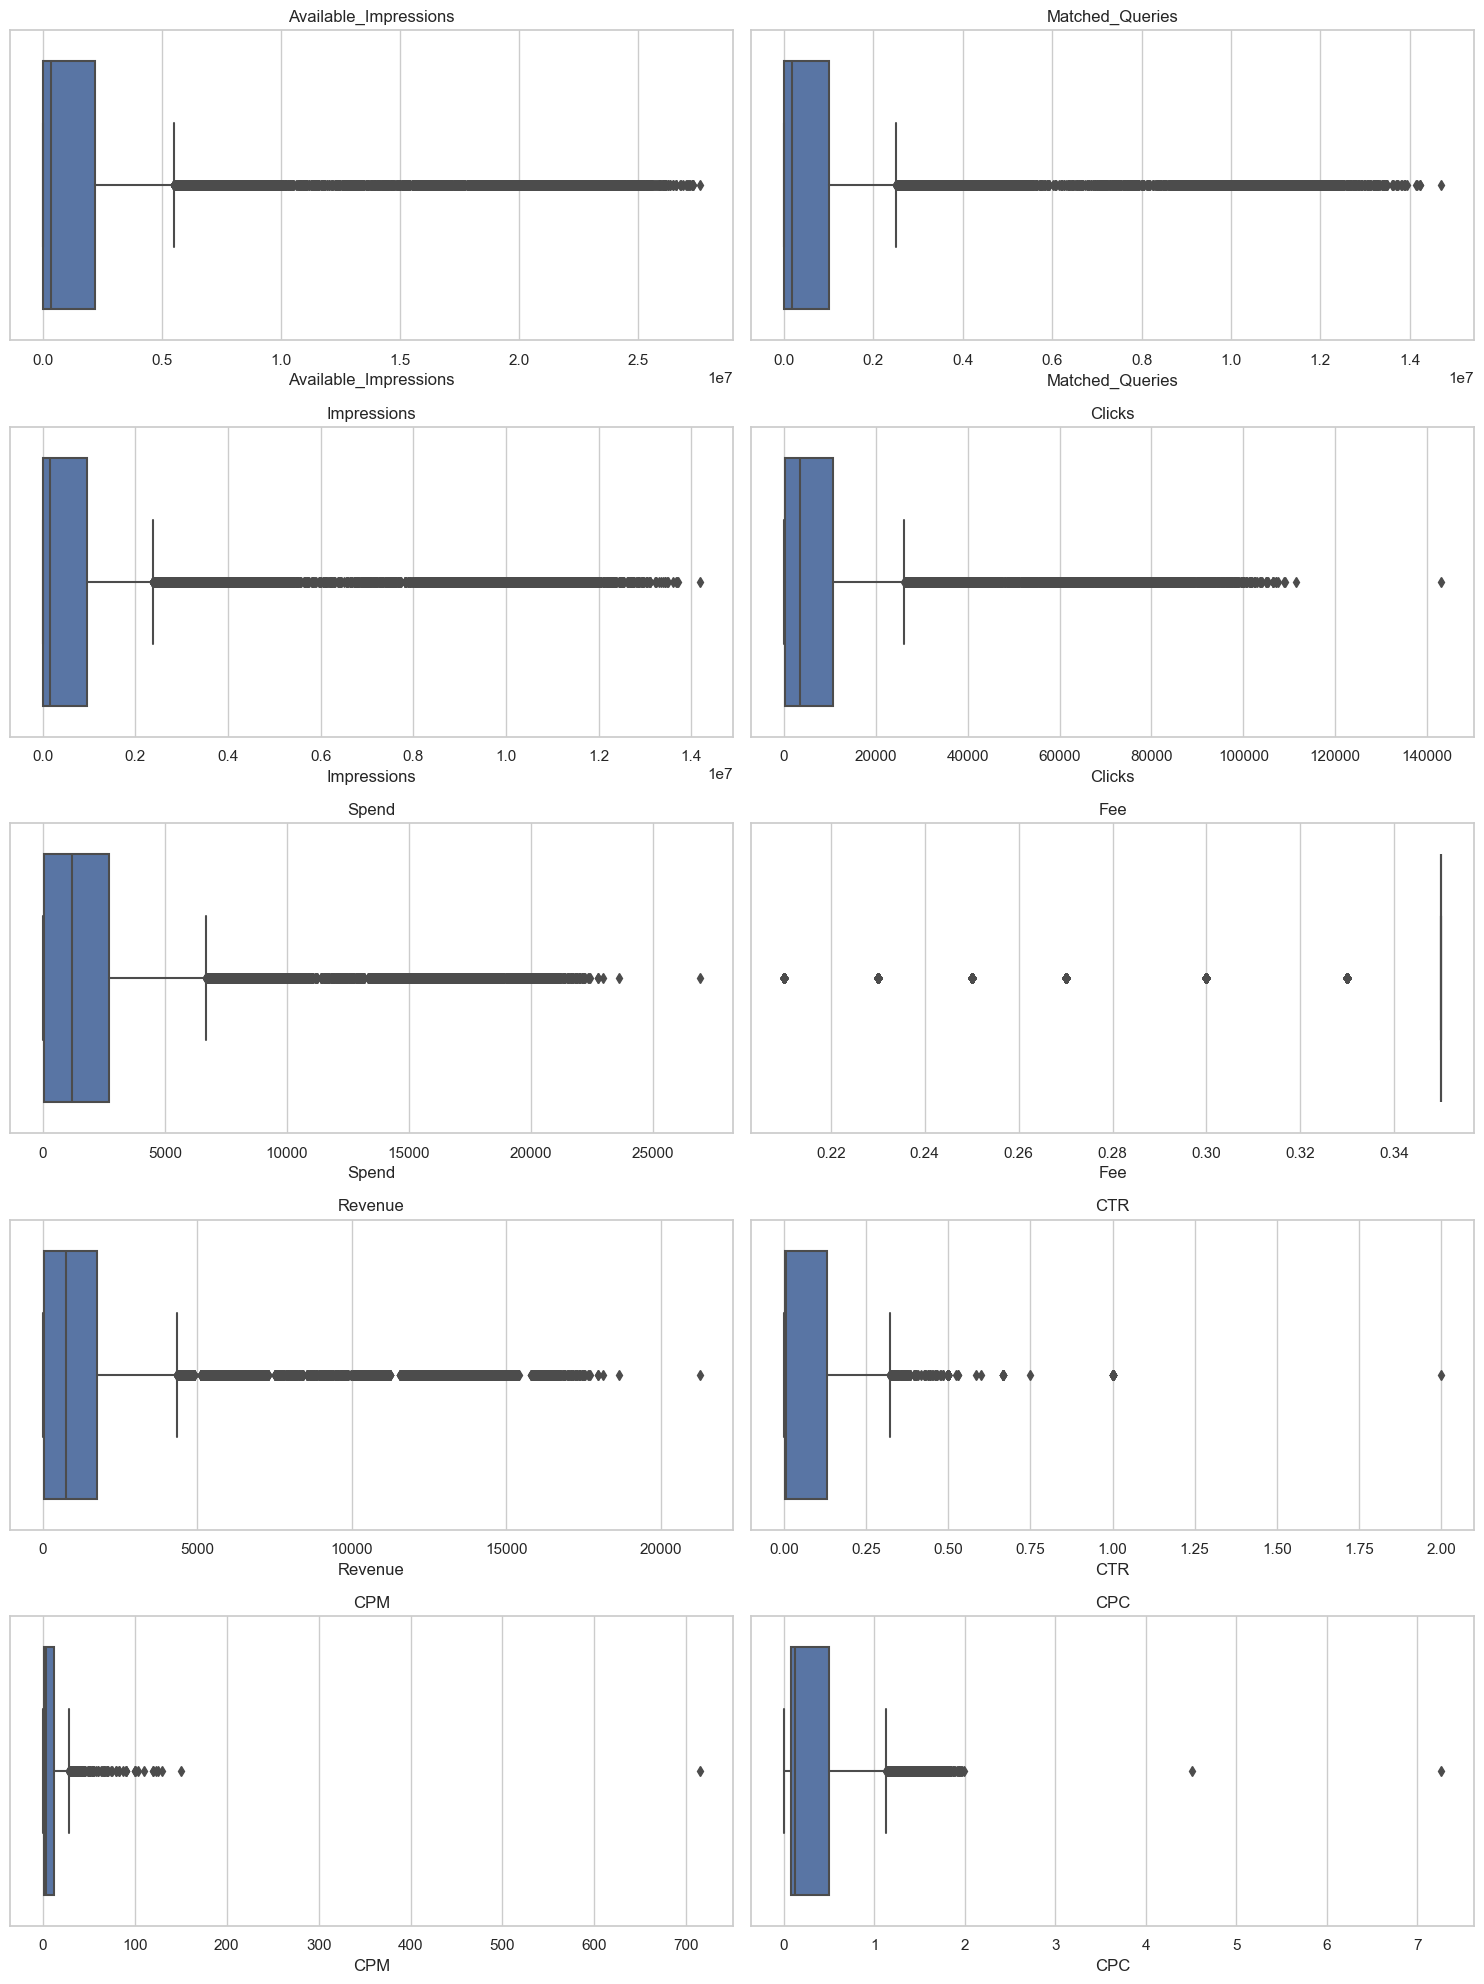

In [154]:
#visualizando distribuição das variáveis númericas

colunas_numericas = ['Available_Impressions', 'Matched_Queries', 'Impressions', 'Clicks', 'Spend',
                      'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
for n, variaveis in enumerate(colunas_numericas):
    sns.boxplot(x=df_1[variaveis], ax=axes[n//2, n%2])
    axes[n//2, n%2].set_title(variaveis)

plt.tight_layout()
plt.show()